In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
cat

,fit_time,score_time,test_score
0,6.111532,0.015937,0.920566
1,6.052564,0.012932,0.899820
2,6.697871,0.005439,0.938045
3,6.004517,0.007195,0.933383
4,6.707916,0.006963,0.949361
5,6.161040,0.005133,0.934502
6,6.002455,0.011192,0.944618
7,6.248721,0.010081,0.924652
8,5.740386,0.004333,0.947610
9,5.684143,0.004343,0.883656


In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.920566
1,0.899820
2,0.938045
3,0.933383
4,0.949361
5,0.934502
6,0.944618
7,0.924652
8,0.947610
9,0.883656


In [11]:
ordinald1 = pd.read_csv('OrdinalDropIF309.csv')
ordinald1.shape

(2579, 83)

In [12]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [13]:
Xd1 = ordinald1.drop(['SalePrice'], axis=1)
yd1 = ordinald1.SalePrice

In [14]:
catd1 = evaluate_model(cb, Xd1, yd1)

In [15]:
catd1

,fit_time,score_time,test_score
0,7.248662,0.010109,0.931308
1,6.320359,0.016610,0.946897
2,6.545735,0.008811,0.946280
3,6.086632,0.008002,0.911824
4,6.024109,0.012140,0.949900
5,6.226017,0.010268,0.933133
6,6.012528,0.008017,0.929582
7,6.182285,0.008850,0.926053
8,5.142067,0.005198,0.950737
9,5.219143,0.004318,0.939564


In [16]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [17]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [18]:
ordinalIF1 = pd.read_csv('OrdinalDropIF50.csv')
ordinalIF1.shape

(2579, 81)

In [19]:
ordinalIF1

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0,3,3,3,3,3,3,8,4,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,3.0,5.0,6.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,4.0,856,126000,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,68.516053,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,1,4,3,4,3,3,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,0.0,4.0,3.0,1049,139500,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,42.000000,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0
2,2,4,3,3,3,5,4,8,0,1,3,1,0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,0.0,3.0,0.0,6.0,1.0,1.0,3.0,5.0,0.0,4.0,1.0,9.0,4.0,6.0,2.0,1.0,1001,124900,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,60.000000,0.0,737.0,0.0,100.0,837.0,0.0,0.0,1930.0,1.0,216.0
3,3,4,4,2,3,4,3,8,0,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,0.0,3.0,6.0,6.0,1.0,1.0,3.0,5.0,0.0,4.0,1.0,9.0,4.0,11.0,7.0,3.0,1039,114000,8146,4,8,1900,2003,717,322,0,1,0,2,1,6,0,0,0,168,0,111,0,0,80.000000,0.0,0.0,0.0,405.0,405.0,0.0,0.0,1940.0,1.0,281.0
4,4,4,3,4,3,5,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,2.0,2.0,3.0,2.0,6.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,10.0,2.0,3.0,1665,227000,8400,8,6,2001,2001,810,855,0,2,1,3,1,6,0,0,45,0,0,0,0,0,70.000000,0.0,643.0,0.0,167.0,810.0,1.0,0.0,2001.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,2575,3,3,3,3,2,2,8,4,1,2,1,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,0.0,3.0,6.0,6.0,3.0,0.0,1.0,5.0,1.0,4.0,1.0,9.0,4.0,6.0,7.0,3.0,952,121000,8854,6,6,1916,1950,952,0,0,1,0,2,1,4,1,0,98,0,0,40,0,0,68.516053,0.0,0.0,0.0,952.0,952.0,0.0,0.0,1916.0,1.0,192.0
2575,2576,3,3,0,0,5,3,6,4,1,3,3,0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,7.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,14.0,2.0,3.0,4.0,4.0,4.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,9.0,4.0,5.0,8.0,3.0,1733,139600,13680,3,5,1955,1955,1733,0,0,2,0,4,1,8,1,0,0,0,0,0,0,0,68.516053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1955.0,2.0,452.0
2576,2577,3,3,3,3,3,3,8,0,1,3,3,0,4.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,6.0,2.0,2.0,2.0,5.0,1.0,0.0,8.0,8.0,2.0,1.0,3.0,1.0,6.0,1.0,0.0,0.0,0.0,2.0,4.0,1.0,9.0,4.0,15.0,10.0,1.0,2002,145000,6270,5,6,1949,1950,1001,1001,0,2,0,4,2,8,0,0,0,0,0,0,0,0,82.000000,0.0,284.0,0.0,717.0,1001.0,0.0,0.0,1949.0,3.0,871.0
2577,2578,4,3,4,3,5,4,8,3,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,3.0,2.0,6.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,10.0,9.0,1.0,1842,217500,8826,7,5,2000,2000,985,857,0,2,1,3,1,7,1,193,96,0,0,0,0,0,68.516053,144.0,841.0,0.0,144.0,985.0,1.0,0.0,2000.0,2.0,486.0


In [20]:
ordinalIF1 = ordinalIF1.drop(['Unnamed: 0'], axis=1)
ordinalIF1.shape

(2579, 80)

In [21]:
XIF1 = ordinalIF1.drop(['SalePrice'], axis=1)
yIF1 = ordinalIF1.SalePrice

In [22]:
catIF50 = evaluate_model(cb, XIF1, yIF1)

In [23]:
catIF50

,fit_time,score_time,test_score
0,6.640427,0.005632,0.934673
1,6.307249,0.015702,0.941062
2,6.232420,0.013104,0.902468
3,6.173605,0.013027,0.914927
4,6.276677,0.009902,0.948964
5,6.445966,0.009671,0.929478
6,6.161779,0.010803,0.934011
7,6.625848,0.009850,0.929271
8,6.069842,0.003821,0.902674
9,5.596902,0.018489,0.945326


In [24]:
catIF50 = catIF50[['test_score']].rename(columns={'test_score':'catIF1_score'})

In [25]:
catIF50

,catIF1_score
0,0.934673
1,0.941062
2,0.902468
3,0.914927
4,0.948964
5,0.929478
6,0.934011
7,0.929271
8,0.902674
9,0.945326


In [26]:
combo = pd.concat([cat, catd1, catIF50], axis=1)

In [27]:
combo

,cat_score,catd1_score,catIF1_score
0,0.920566,0.931308,0.934673
1,0.899820,0.946897,0.941062
2,0.938045,0.946280,0.902468
3,0.933383,0.911824,0.914927
4,0.949361,0.949900,0.948964
5,0.934502,0.933133,0.929478
6,0.944618,0.929582,0.934011
7,0.924652,0.926053,0.929271
8,0.947610,0.950737,0.902674
9,0.883656,0.939564,0.945326


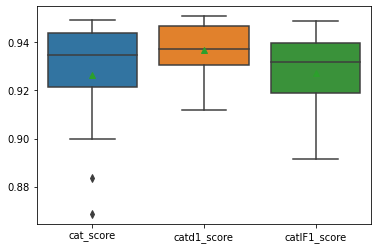

In [28]:
sns.boxplot(data=combo, showmeans=True);

In [29]:
combo.describe()

,cat_score,catd1_score,catIF1_score
count,15.000000,15.000000,15.000000
mean,0.926385,0.936878,0.927222
std,0.024378,0.011131,0.017080
min,0.868666,0.911824,0.891517
25%,0.921228,0.930445,0.919008
50%,0.934502,0.936986,0.931921
75%,0.943737,0.946589,0.939475
max,0.949361,0.950737,0.948964
